In [ ]:
#binary classification (IMDB)

In [1]:
#일부만 할당된 GPU 메모리를 실행하는 동안 필요한 만큼 늘릴 수 있도록 설정함
# 모델 학습 시 불필요한 출력을 끄도록 함 (warning)

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
config =tf.ConfigProto()
config.gpu_options.allow_growth= True
session = tf.Session(config=config)

In [2]:
# 동일한 결과를 재현하기 위해서 random seed 고정
import numpy as np
np.random.seed(777)

## 1.데이터 준비

In [5]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
#10000개 가져오는게 데이터 중에서 10000번째로 많이 등장한 워드를 가져오게 설정해놓은거

17465344/17464789 [==============================] - 4s 0us/step


ValueError: Object arrays cannot be loaded when allow_pickle=False

In [38]:
from tensorflow.keras.datasets import imdb
import numpy as np

#save np.load
np_load_old = np.load

#modify the default parameters of np.load
np.load = lambda *a, **k : np_load_old(*a, allow_pickle=True, **k)

#call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#restore np.load for future normal usage
np.load = np_load_old

In [6]:
#모양 알아보기
sample_idx = 4
print(train_data[sample_idx])
len(train_data[sample_idx])

[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 14, 20, 56, 33, 2401, 18, 457, 88, 13, 2626, 1400, 45, 3171, 13, 70, 79, 49, 706, 919, 13, 16, 355, 340, 355, 1696, 96, 143, 4, 22, 32, 289, 7, 61, 369, 71, 2359, 5, 13, 16, 131, 2073, 249, 114, 249, 229, 249, 20, 13, 28, 126, 110, 13, 473, 8, 569, 61, 419, 56, 429, 6, 1513, 18, 35, 534, 95, 474, 570, 5, 25, 124, 138, 88, 12, 421, 1543, 52, 725, 6397, 61, 419, 11, 13, 1571, 15, 1543, 20, 11, 4, 2, 5, 296, 12, 3524, 5, 15, 421, 128, 74, 233, 334, 207, 126, 224, 12, 562, 298, 2167, 1272, 7, 2601, 5, 516, 988, 43, 8, 79, 120, 15, 595, 13, 784, 25, 3171, 18, 165, 170, 143, 19, 14, 5, 7224, 6, 226, 251, 7, 61, 113]


147

In [10]:
print(train_labels[sample_idx])

0


In [39]:
word_index = imdb.get_word_index() #특정 단어를 하나의 정수 인덱스로 매핑해놓은 딕셔너리
#word 들만 들어가 있고 심벌은 빠진 글
reverse_word_index = dict([(v,k) for (k,v) in word_index.items()]) # {단어 : 정수} -->{정수:단어}

#벡터화 된 문장을 텍스트로 디코딩
#0,1,2번째 단어는 '패딩','문서 시작','사전에 없음'을 뜻하는 기호임

decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[sample_idx]])

# train_data에 4라고 쓰여진 단어는 word_index에 1이라고 쓰여져서 i-3 만큼 인덱스넘버가 차이남 
# 뒤에 '?'는 .get(a,b)는 key로 접근해서 a에 해당하는 거를 가져오고 없으면 b를 출력

print(decoded_review)

? worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the ? and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life


2. 데이터 전처리

In [40]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 결과를 저장할 0 행렬 생성
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 # 문장에 존재하는 단어들만 one-hot encoding
        # enumerate 옆에 0부터 인덱싱해줌 , sequence는 단어를 의미하는 숫자들을 담고 있음
        # a=np.array()일 때, a[1,[4,3,8,6]]은 a의 1행의 4,3,8,6열을 의미함.
        # 0행렬인 np.zeros((len(sequences), dimension))의 i행의 [단어에 해당하는 번호의 열]을 0에서 1로 바꾸라는 의미
    return results

# 문장들을 일정한 크기의 벡터로 변환
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [41]:
# 리스트 형태인 레이블을 벡터로 변환
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [32]:
for i in range(len(X_train)): 
    print(X_train[i][1]==0)
    

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25000, 10000)
(25000,)
(25000, 10000)
(25000,)


In [43]:
X_valid = X_train[:10000]
X_train = X_train[10000:] #두번 실행하면 처음에 1~10000 10001~25000이었다가 한번더하면 10001~20000이랑 20001~25000이 되서 위험함.
y_valid = y_train[:10000]
y_train = y_train[10000:]

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(15000, 10000)
(15000,)
(10000, 10000)
(10000,)
(25000, 10000)
(25000,)


3.네트워크 정의

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

4. 모델 컴파일

In [24]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

5. 모델 학습

In [45]:
history = model.fit(X_train, 
                    y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(X_valid, y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 358us/step - loss: 0.4527 - acc: 0.8273 - val_loss: 0.3235 - val_acc: 0.8762
Epoch 2/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.2408 - acc: 0.9149 - val_loss: 0.2764 - val_acc: 0.8884
Epoch 3/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.1751 - acc: 0.9395 - val_loss: 0.2846 - val_acc: 0.8868
Epoch 4/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.1331 - acc: 0.9557 - val_loss: 0.2957 - val_acc: 0.8861
Epoch 5/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.1054 - acc: 0.9655 - val_loss: 0.3244 - val_acc: 0.8832
Epoch 6/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.0827 - acc: 0.9737 - val_loss: 0.3643 - val_acc: 0.8798
Epoch 7/20
15000/15000 [==============================] - 2s 146us/step - 

6. 학습 과정 확인

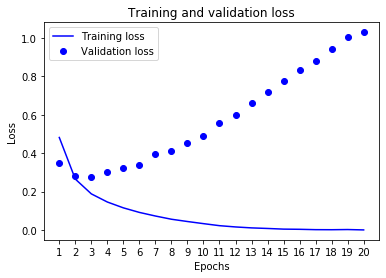

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss') # 'b'는 파란색 실선을 의미
plt.plot(epochs, val_loss, 'bo', label='Validation loss') # 'bo'는 파란색 점을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

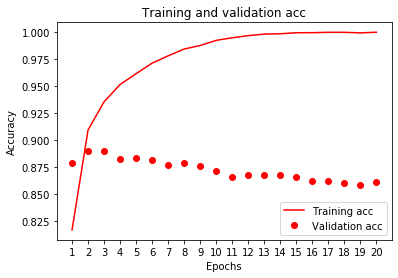

In [27]:
import matplotlib.pyplot as plt


acc, val_acc = history.history['acc'], history.history['val_acc']
epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()

plt.show()

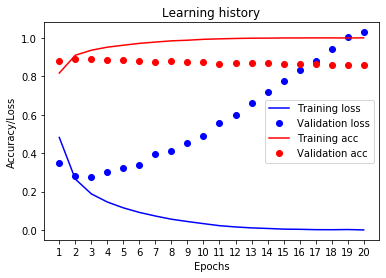

In [28]:
import matplotlib.pyplot as plt

loss, val_loss = history.history['loss'], history.history['val_loss']
acc, val_acc = history.history['acc'], history.history['val_acc']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Learning history')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test loss(20 epochs): ', test_loss)
print('test acc(20 epochs): ', test_acc)

25000/25000 [==============================] - 5s 202us/sample - loss: 0.3244 - acc: 0.8694
test loss(20 epochs):  0.32439946328639985
test acc(20 epochs):  0.86944


7.(과대적합 되기 전까지) 모델 학습

In [46]:
# 기존 model 객체를 사용하면 이어서 학습되므로, 새로운 model 객체를 생성함
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
#'relu'는 점곱만으로는 선형 학습만 학습하므로 비선형성을 주기 위해 추가
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_train, 
                    y_train,
                    epochs=3,
                    batch_size=256,
                    validation_data=(X_valid, y_valid))

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 3s 168us/step - loss: 0.4679 - acc: 0.8223 - val_loss: 0.3305 - val_acc: 0.8800
Epoch 2/3
15000/15000 [==============================] - 2s 151us/step - loss: 0.2526 - acc: 0.9109 - val_loss: 0.2751 - val_acc: 0.8913
Epoch 3/3
15000/15000 [==============================] - 2s 155us/step - loss: 0.1822 - acc: 0.9355 - val_loss: 0.2772 - val_acc: 0.8878


In [31]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test loss(3 epochs): ', test_loss)
print('test acc(3 epochs): ', test_acc)

25000/25000 [==============================] - 3s 135us/sample - loss: 0.3244 - acc: 0.8694s - loss: 0.323
test loss(3 epochs):  0.32439946328639985
test acc(3 epochs):  0.86944


8. 학습된 모델로 새로운 데이터 예측

In [1]:
# 여러 개 동시에 예측
result = model.predict(X_test)
print(result)
print(X_test)

# 하나씩 개 동시에 예측
sample = X_test[0]
result = model.predict(np.expand_dims(sample, axis=0))
print(result)

NameError: name 'model' is not defined

9. keras에 자동화된 조기 종료 콜백함수 버전 (EarlyStopping)

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
#ModelCheckpoint 구조정보, 각각 w에 할당되는 값을 저장

EarlyStopModel = Sequential()
EarlyStopModel.add(Dense(16, activation='relu', input_shape=(10000,)))
EarlyStopModel.add(Dense(16, activation='relu'))
EarlyStopModel.add(Dense(1, activation='sigmoid'))

EarlyStopModel.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


# patience : n , mini-batch를 쓰면 오르락내리락을 할 수 있어서 오버피팅 되기전에 
# 올라갔다 다시 내려갈 수 있어서 n번정도는 기다려준다.

# 상대경로 : (모델 구조저장하는)포맷h5 --> model.h5 또는 ./model.h5==>파이썬을 돌리는 현재 경로에 저장
# ../model.h5 : 현재 경로의 상위 폴더
# 절대 경로 : 'C:/~/~/~/.model.h5'

# save_best_only = 'True' best만 저장
callbacks_list = [EarlyStopping(monitor='val_loss', patience=3),
                  ModelCheckpoint(filepath='EarlyStopModel.h5', monitor='val_loss', save_best_only=True)]
history = EarlyStopModel.fit(X_train,
                             y_train, 
                             epochs=20,
                             batch_size=256,
                             validation_data=(X_valid, y_valid),
                             callbacks = callbacks_list)


#저장된 모델 불러올 때 from keras.model import load_model




Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.4921 - acc: 0.8129 - val_loss: 0.3600 - val_acc: 0.8809
Epoch 2/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.2785 - acc: 0.9083 - val_loss: 0.2866 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.1980 - acc: 0.9321 - val_loss: 0.2716 - val_acc: 0.8904
Epoch 4/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.1509 - acc: 0.9480 - val_loss: 0.2786 - val_acc: 0.8888
Epoch 5/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.1190 - acc: 0.9611 - val_loss: 0.3017 - val_acc: 0.8837
Epoch 6/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.0934 - acc: 0.9714 - val_loss: 0.3400 - val_acc: 0.8831


조기종료 학습 과정 확인

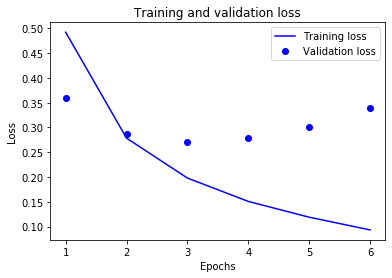

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss') # 'b'는 파란색 실선을 의미
plt.plot(epochs, val_loss, 'bo', label='Validation loss') # 'bo'는 파란색 점을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

최적 모델 불러오기

In [50]:
from keras.models import load_model

model = load_model('EarlyStopModel.h5')
print('>> model load!!')

>> model load!!


성능평가

In [52]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test loss: ', test_loss)
print('test acc: ', test_acc)

#저장된 모델 불러올 때 from keras.model import load_model

25000/25000 [==============================] - 3s 130us/step
test loss:  0.2873406796360016
test acc:  0.88496
